In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
class Model:
    #Modelo para regresión lineal y = XW
    def __init__(self, NDIM, X, ytrue):
        self.NDIM = NDIM
        self.X = X
        self.y = ytrue

        #Defino los parámetros
        self.W = np.ones([NDIM+1, 1])

    #Resuelvo analíticamente con mínimos cuadrados
    def train(self):
        assert self.X is not None, 'X está vacío.'

        #La solucion es W = (Xt X)^-1 Xt y
        self.W = np.dot(np.dot(linalg.inv(np.dot(self.X.T, self.X)), self.X.T), self.y)


    def predict(self, X):
        return np.dot(X, self.W)
    
    def error(self, X, ytrue):
        assert ytrue.shape[0] is not None, 'y esta vacío.'
        return linalg.norm(ytrue - self.predict(X))**2 / ytrue.shape[0]


In [8]:
#Función para generar datos aleatorios
def generar_datos(NDIM, m):
    Wtrue = np.random.uniform(-1, 1, NDIM+1)
    X = np.random.uniform(-1e8, 1e8, size=(m, NDIM))
    X = np.hstack((np.ones([m,1]), X))
    noise = np.random.normal(loc= 0, scale=10, size=(m,))

    ytrue = np.dot(X, Wtrue) + noise
    
    return X, ytrue


In [81]:
def run_model(mindim, maxdim, m):
    split = int(.7*m)

    error_test = {}

    for NDIM in range(mindim, maxdim+1):
        Xall, yall = generar_datos(NDIM, m)
        Xtrain = Xall[0:split]
        ytrain = yall[0:split]
        Xtest = Xall[split:]
        ytest = yall[split:]

        model = Model(NDIM, Xtrain, ytrain)
        model.train()

        error_test[NDIM] = model.error(Xtest, ytest)
        
    #    print("NDIM: ", NDIM)
    #    print("Train error: ", model.error(Xtrain, ytrain))
    #    print("Test error: ", error_test[NDIM])
    return error_test
        


In [93]:
error_test = run_model(2, 500, 500)

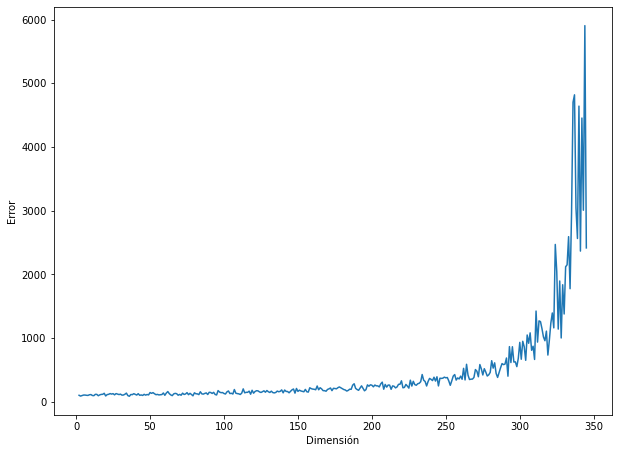

In [107]:
#Limpio los datos
error_clean = {keys:outliers for keys, outliers in error_test.items() if outliers < 1e4}

#Graficamos el error
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(1, 1, 1)
lines = ax.plot(error_clean.keys(), error_clean.values())
ax.set_xlabel("Dimensión")
ax.set_ylabel("Error")

plt.show()


(1000, 2)


ValueError: x and y must be the same size

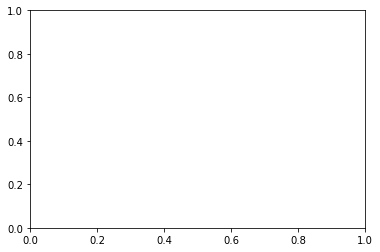

In [37]:
#Hago PCA a los datos reales para plotear la recta
from xml.sax import default_parser_list


data = (Xall, yall) = generar_datos(10, 1000)

pca = PCA(n_components=2)
data = pca.fit_transform(*data)
print(data.shape)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pca.components_, yall)
